# Ollama model evaluation analyses
- this notebook shows some analyses for the ollama evaluations

In [19]:
# import libraries
import toml
import psycopg2
import matplotlib.pyplot as plt
import numpy as np

In [20]:
# load configurations
config = toml.load('model_evaluation.toml')
file = open("/home/tom/Documents/AIP/Bachelorarbeit/creds/psql.pass", "r")
passwd = file.read().strip()
file.close()

In [21]:
# Connect to the database
con = psycopg2.connect( 
    dbname="model_evaluation",
    user="local", 
    password=passwd, 
    host="141.33.165.24" 
)
cur = con.cursor()

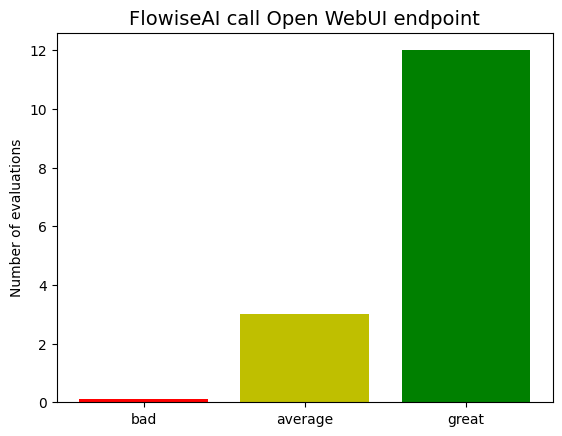

In [22]:
# get the number of evaluations for each class
review_list = []
for i in range(0,3):
    cur.execute(f"SELECT COUNT(*) FROM model_evaluation_workflow WHERE review={i};")
    review_list.append(cur.fetchone()[0])
    if(review_list[i] == 0):
        review_list[i] = 0.1
labels = ['bad', 'average', 'great']

# create the plot
plt.bar(labels, review_list, color=['r', 'y', 'g'])
plt.title('FlowiseAI call Open WebUI endpoint', fontsize=14)
plt.ylabel('Number of evaluations')
#plt.show()
plt.savefig('model_evaluation_workflow.png',format='png', bbox_inches='tight')

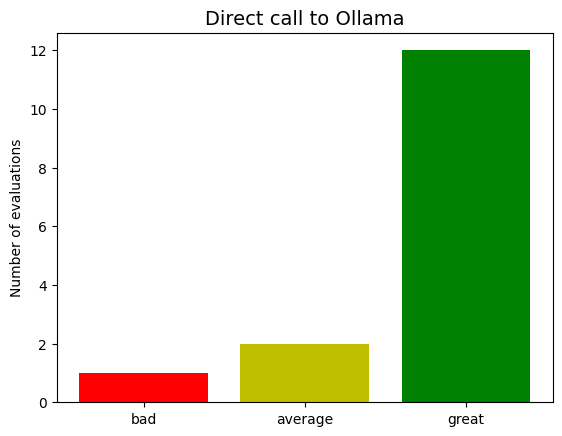

In [23]:
# get the number of evaluations for each class
review_list = []
for i in range(0,3):
    cur.execute(f"SELECT COUNT(*) FROM model_evaluation WHERE review={i} AND model='qwen2.5-coder:32b-instruct-q8_0';")
    review_list.append(cur.fetchone()[0])
labels = ['bad', 'average', 'great']

# create the plot
plt.bar(labels, review_list, color=['r', 'y', 'g'])
plt.title('Direct call to Ollama', fontsize=14)
plt.ylabel('Number of evaluations')
#plt.show()
plt.savefig('model_evaluation.png',format='png', bbox_inches='tight')

In [24]:
cur.close()